# Summary
In this assignment I used Gaussian Naive Bayes (GNB) classifier to classify datapoints of classes at each dataset. In this process, after GNB-modeling and calculating accuracy, I performed an EDA with the pupose of understaning the suitability of GNB for each specific dataset. Confusion-matrix and classification_report were applied to evaluate more metrics and consequently ability to accurately judge about the used classification model (GNB). In the statistical part of EDA I made summary descriptions on the grouped and stacked data. In the visualization part, I got help fom boxplots, since they can represent the distribution and outliers of datasets, simply and practically. At the end of each dataset analysis, I tried to find the best alternative classifier for that specific dataset, considering patern of datapoints (their overlap and shape), exsitance of outliers and the how variables are correlated. 

In [1]:
# Loading Required Libraries
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import sklearn.metrics

# Dataset 1

Pairplot could be informative in order to find correlations between variables. Then it will give us intuition to judge which model could be more suitable for the dataset.

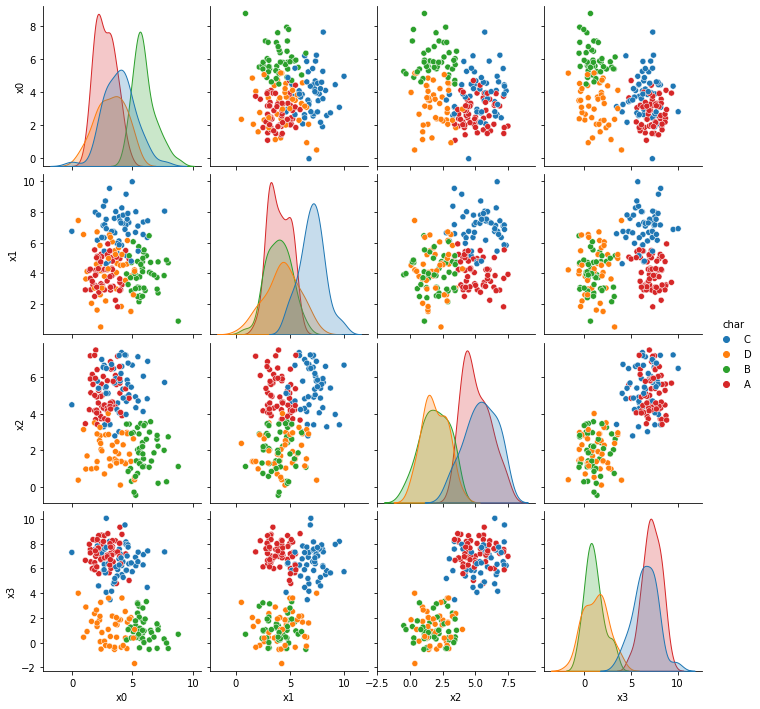

In [2]:
#Reading data to a dataframe
df1 = pd.read_csv('data/dataset1.csv').drop('Unnamed: 0', axis=1)
#drawing pairplot using seaborn
sns.pairplot(data =df1, hue='char')

#### How to interprete pairplots
In the pairplot, the normal distribution shows us how similar/different classes are considering any specific variable. The more overlap between them, the more similar they are considering that specific variable, and vice versa. On the other hand, scater plots show correlations beteen different variables.Therefore, overlap bewtween datapoints of different categories shows similar correlation between variables of those categories.Also, shape of datapoints of each category shows the dependency between variables for that specific chategory, meaning that the more circular points are, the less dependent variables will be. 
##### Pairplot-Dataset 1
Looking at the pairplots of dataset 1, we do not observe outliers in the first glance which could be advantageous regarding leading to a higher accuracy. There are some extend of overlap between classes datapoints and shape of points are close to circle. In gneral this dataset looks a good candidate for GNB classifier in the first impression.

Let's see if GaussianNB is an appropriate model for this dataset or not.
* classes have overlap, hense they probaly do NOT have unique characteristics compared to eachother. 
* But on the other hand they are almost oval shape which means variable are uncorrelated.

So, it could be challenging, let's see!

In [3]:
#First five rows of DataFrame
df1.head()

,x0,x1,x2,x3,char
0,5.90,7.34,6.07,7.11,C
1,2.33,2.61,2.80,0.07,D
2,3.44,6.73,6.49,4.75,C
3,5.83,4.77,2.42,1.80,B
4,4.12,8.26,6.61,5.49,C


In [4]:
#Shape of dataframe
df1.shape

(200, 5)

In [5]:
x_train, x_test, y_train, y_test = train_test_split(df1.values[:,0:4], df1.values[:,4], test_size=0.5, random_state=0)

In [6]:
#Save GaussianNB to an object
gnb = GaussianNB()

In [7]:
#Training GaussianNB model
gnb.fit(x_train, y_train)

GaussianNB()

In [8]:
#Testing trained-GaussianNB model
y_pred = gnb.predict(x_test)
#predicted test-target values
y_pred

array(['A', 'B', 'D', 'D', 'B', 'A', 'A', 'A', 'B', 'B', 'A', 'D', 'B',
       'C', 'B', 'A', 'B', 'A', 'D', 'A', 'D', 'A', 'A', 'B', 'C', 'B',
       'D', 'C', 'B', 'A', 'A', 'C', 'A', 'C', 'C', 'B', 'B', 'C', 'D',
       'A', 'A', 'B', 'C', 'A', 'D', 'D', 'A', 'D', 'A', 'D', 'C', 'B',
       'A', 'A', 'A', 'C', 'C', 'C', 'A', 'C', 'C', 'D', 'D', 'C', 'B',
       'B', 'D', 'C', 'D', 'A', 'D', 'C', 'A', 'D', 'A', 'A', 'A', 'A',
       'C', 'B', 'B', 'D', 'B', 'B', 'A', 'C', 'C', 'C', 'B', 'D', 'C',
       'C', 'A', 'C', 'D', 'B', 'C', 'A', 'A', 'A'], dtype='<U1')

In [9]:
#Real test target values
y_test

array(['A', 'B', 'D', 'D', 'B', 'A', 'C', 'A', 'B', 'B', 'A', 'B', 'B',
       'C', 'B', 'A', 'B', 'A', 'D', 'A', 'D', 'A', 'A', 'B', 'C', 'B',
       'D', 'A', 'B', 'A', 'A', 'C', 'A', 'C', 'C', 'D', 'B', 'C', 'D',
       'A', 'A', 'B', 'C', 'A', 'D', 'D', 'A', 'D', 'C', 'B', 'C', 'B',
       'A', 'A', 'A', 'C', 'C', 'C', 'A', 'C', 'C', 'D', 'D', 'C', 'B',
       'B', 'C', 'C', 'D', 'A', 'D', 'C', 'A', 'D', 'A', 'A', 'A', 'A',
       'C', 'D', 'B', 'D', 'B', 'B', 'A', 'C', 'C', 'C', 'B', 'D', 'C',
       'C', 'A', 'C', 'D', 'B', 'A', 'A', 'A', 'A'], dtype=object)

How many test-samples are detected correctly?

In [10]:
sum(y_test == y_pred)

91

How many test-samples totally we have?

In [11]:
len(y_pred)

100

What is the accuracy of our prediction?

In [12]:
accuracy = sum(y_test == y_pred)/len(y_pred)*100
print('accuracy = ', accuracy, '%')

accuracy =  91.0 %


we also can predict accuracy using 'precision_score' function from ' sklearn.metrics' module like below which results the same value,

In [13]:
accuracy_sklearn = sklearn.metrics.precision_score(y_test, y_pred, average = 'micro')
print('accuracy = ', accuracy_sklearn*100, '%')

accuracy =  91.0 %


91% accuracy is not too bad for the accuracy. Therefore Gaussian Naive Bayes could be a good model to predict chatogories in this dataset.

## EDA on Dataset 1

In [14]:
#numerical summary of each attribute
df1.describe()

,x0,x1,x2,x3
count,200.000000,200.000000,200.000000,200.000000
mean,3.867050,4.825200,3.780600,4.388700
std,1.625247,1.776221,1.980677,3.096571
min,-0.020000,0.520000,-0.470000,-1.700000
25%,2.595000,3.472500,2.080000,1.280000
50%,3.700000,4.670000,3.935000,5.530000
75%,5.065000,6.072500,5.402500,7.170000
max,8.790000,9.960000,7.510000,10.050000


In [15]:
df1.groupby('char').mean()

,x0,x1,x2,x3
char,,,,
A,2.738167,3.980333,5.070000,7.228667
B,5.953778,3.922222,1.892222,1.057556
C,3.916038,6.998868,5.408302,6.519245
D,3.182143,4.256667,1.907857,1.212143


In [16]:
df1.groupby('char').describe().stack().reset_index()

,char,level_1,x0,x1,x2,x3
0,A,count,60.000000,60.000000,60.000000,60.000000
1,A,mean,2.738167,3.980333,5.070000,7.228667
2,A,std,0.844222,0.972317,1.062091,0.979203
3,A,min,1.100000,1.830000,3.420000,4.780000
4,A,25%,2.040000,3.152500,4.230000,6.622500
5,A,50%,2.640000,3.910000,4.895000,7.195000
6,A,75%,3.310000,4.947500,5.845000,8.005000
7,A,max,4.720000,5.920000,7.510000,9.330000
8,B,count,45.000000,45.000000,45.000000,45.000000
9,B,mean,5.953778,3.922222,1.892222,1.057556


In [17]:
#Distribution of categories
df1.groupby('char').size()

char
A    60
B    45
C    53
D    42
dtype: int64

We can see that there is not a uniform distribution between class instances.This can lead precisioin to not datasetbe an ideal metric to evaluate performance of model. Then let's discover other metrics as well.

### Confusion Matrix
We can then use confusion matrix to find deiatles of predictions vs actual labels for each class. "sklearn.metrics" modul provides us two fuctions for this porpuse. 

In [18]:
from sklearn.metrics import confusion_matrix, classification_report

In [19]:
confusion_matrix(y_test, y_pred)

array([[31,  0,  2,  0],
       [ 0, 20,  0,  2],
       [ 2,  0, 23,  1],
       [ 0,  2,  0, 17]])

In this confusion matrix we can see that GNB model had 2 wrong predictions for each classes 1,2,and 4, also 3 wrong prediction for class 3. 

In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           A       0.94      0.94      0.94        33
           B       0.91      0.91      0.91        22
           C       0.92      0.88      0.90        26
           D       0.85      0.89      0.87        19

    accuracy                           0.91       100
   macro avg       0.90      0.91      0.91       100
weighted avg       0.91      0.91      0.91       100



In the above classification report we can see how precision, recal, f1-score and number of samples were for each class and whole dataset in this GNB model. Also we can see accuracy of moddel which is equal to two other accuracies calculated manually and using```precision_score``` function.

#### Question: What does "f-1 score"  represents in classification_report?
The f1-score gives us the harmonic mean of precision and recall. 
#### Question: What does "support"  represents in classification_report?
The support is the number of samples of the true response that lie in that class (actual labels). 
#### Question: What is "macro avg"  in classification_report?
Metrics are calculated and averaged ignoring proportation of each label.
#### Question: What is "weighted avg"  in classification_report?
Metrics are calculated and averaged considering proportation of each label.

**Point :** Since "macro avg" and "weighted avg" shwing pretty much the same values, we can conclude that ununiform distribution did not made a major change in the precision of this dataset (only 1%).

#### Question: Why accuracy alone is not enough metric for classification task? 
Becase accuracy only could be perfectly reliable when we have a balanced set of samples. But  it is not always true. For example if we want to do analysis on the covid-19 test results. Most of results are negative. If we have 100 samples and only two of them are possitive, and we only detect one possitive, it means the accuracy is 99%, precision is 100%, but recall is 50%. Also f-1 score is 0.66%. Between all these metrics only recal and f-1 could represent that negative-detection of one actual-possitive sample is a considerable error.

## Boxplots-Dataset 1

We can evaluate the overlap in datapoints of different class for each variable, using boxplot, very well.

<AxesSubplot:xlabel='char', ylabel='x0'>

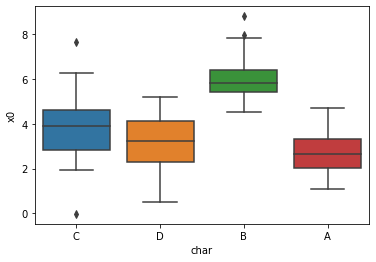

In [21]:
sns.boxplot(x="char", y="x0", data=df1)

we can also show datapoints on top of the boxes as below. As we can see in the plot below, outliers are illustrated by black-diamonds and normal-datapoints are black-dots.

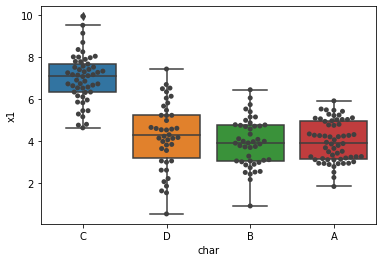

In [22]:
sns.boxplot(x="char", y="x1", data=df1)
ax = sns.swarmplot(x="char", y="x1", data=df1, color=".25")

<AxesSubplot:xlabel='char', ylabel='x2'>

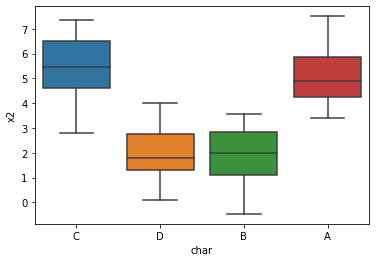

In [23]:
sns.boxplot(x="char", y="x2", data=df1)

<AxesSubplot:xlabel='char', ylabel='x3'>

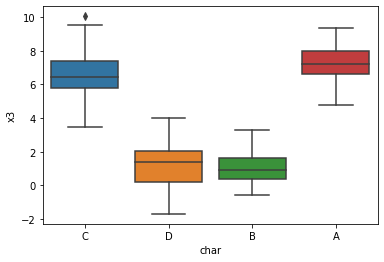

In [24]:
sns.boxplot(x="char", y="x3", data=df1)

As we can see in rgw above boxplots there are negligible outliers in the dataset 1, which is compatible with our initial visual judgment. In all four above boxplots we can see some amount of overlap between classes which make it far from an ideal dataset for use of GNB model.

### What Classifier would be more accurate for Dataset 1

I am not sure at this point, since GNB is the only classifier I am familiar with. But according to the following image and pattern of datapoints in the dataset 1, I would say:
Since datapotns of diffrent classes have just simply some overlap without any specific unsual form, the third row of dataset could be similar to dataset 1. Naive bayes is the best accompanies with some other models with the same accuracies such as AdaBoost,Nueral Net,Decision Tree and svm. These alternatives could be tried and their metrics should be evaluated to see which one leads to better metrics.


![pic](data/classifiers.png)

*The lower right shows the classification accuracy on the test set.*

[Ref](https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html)

# Dataset 2

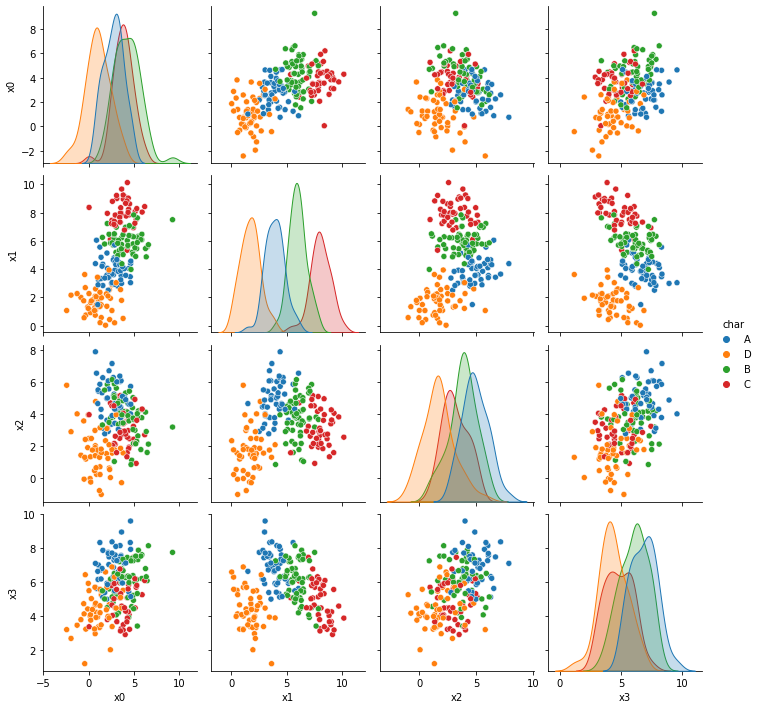

In [26]:
df2 = pd.read_csv('data/dataset2.csv').drop('Unnamed: 0', axis=1)
sns.pairplot(data =df2, hue='char')

##### Pairplot-Dataset 2
This dataset even have more overlap compared to the first dataset. But data points still are forming circular shape rather than linear which is a good sign.Also, We do not see considerable pattern of outliers in the first glance. 

Let's see how GaussianNB works on that dataset 2. 

In [27]:
#First five rows of DataFrame
df2.head()

,x0,x1,x2,x3,char
0,2.74,3.60,5.15,6.86,A
1,0.16,1.08,-0.01,3.98,D
2,-0.31,0.75,1.20,3.21,D
3,3.01,5.19,4.60,5.50,B
4,2.80,4.80,5.24,7.28,A


In [28]:
#shape of DataFrame
df2.shape

(200, 5)

In [29]:
# Splitting dataset to test and train 
x_train2, x_test2, y_train2, y_test2 = train_test_split(df2.values[:,0:4], df2.values[:,4], test_size=0.5, random_state=0)

In [30]:
gnb2 = GaussianNB()

In [31]:
gnb2.fit(x_train2, y_train2)

GaussianNB()

In [32]:
y_pred2 = gnb2.predict(x_test2)
y_pred2

array(['B', 'D', 'D', 'C', 'A', 'D', 'B', 'A', 'B', 'D', 'D', 'B', 'D',
       'A', 'D', 'A', 'A', 'D', 'B', 'C', 'B', 'C', 'B', 'A', 'C', 'D',
       'B', 'B', 'A', 'B', 'C', 'D', 'B', 'A', 'C', 'A', 'B', 'A', 'C',
       'B', 'D', 'D', 'A', 'D', 'B', 'A', 'C', 'D', 'A', 'C', 'C', 'A',
       'D', 'B', 'D', 'B', 'B', 'C', 'B', 'A', 'D', 'C', 'C', 'A', 'A',
       'B', 'B', 'B', 'D', 'C', 'C', 'D', 'B', 'B', 'B', 'A', 'B', 'D',
       'B', 'B', 'B', 'D', 'C', 'D', 'C', 'B', 'D', 'A', 'C', 'D', 'A',
       'B', 'A', 'A', 'C', 'B', 'D', 'C', 'A', 'A'], dtype='<U1')

In [33]:
y_test2

array(['B', 'D', 'D', 'C', 'A', 'D', 'A', 'A', 'B', 'D', 'D', 'B', 'D',
       'A', 'D', 'A', 'A', 'D', 'B', 'C', 'A', 'C', 'B', 'A', 'B', 'D',
       'B', 'B', 'A', 'A', 'C', 'D', 'B', 'A', 'C', 'B', 'B', 'A', 'C',
       'B', 'D', 'D', 'A', 'D', 'B', 'A', 'C', 'D', 'A', 'C', 'C', 'A',
       'D', 'B', 'D', 'B', 'B', 'C', 'C', 'A', 'D', 'B', 'C', 'A', 'A',
       'B', 'B', 'B', 'D', 'C', 'C', 'D', 'B', 'B', 'B', 'A', 'B', 'D',
       'B', 'B', 'B', 'D', 'B', 'D', 'B', 'B', 'D', 'A', 'C', 'A', 'A',
       'C', 'A', 'A', 'C', 'A', 'D', 'C', 'A', 'A'], dtype=object)

In [34]:
sum(y_test2 == y_pred2)

88

In [35]:
len(y_pred2)

100

In [36]:
accuracy2 = sum(y_test2 == y_pred2)/len(y_pred2)*100
print('accuracy = ', accuracy2, '%')

accuracy =  88.0 %


88% accuracy is not too bad for the accuracy. Therefore Gaussian Naive Bayes could be used for this dataset, however it is not a perfect choice. Considering the pattern of datapoints and refrence figure used before, if we consider the second row of datapoint pattern from that figure, we can guess that **nearest neighbors** would have a better function than GNB. 

# EDA of dataset 2

In [37]:
df2.describe()

,x0,x1,x2,x3
count,200.000000,200.000000,200.00000,200.000000
mean,2.938600,4.798150,3.38265,5.550200
std,1.780729,2.450491,1.68513,1.492606
min,-2.420000,0.030000,-1.00000,1.170000
25%,1.775000,2.877500,2.11250,4.425000
50%,3.040000,4.925000,3.57000,5.580000
75%,4.160000,6.567500,4.60250,6.627500
max,9.250000,10.130000,7.87000,9.590000


In [38]:
df2.groupby('char').mean()

,x0,x1,x2,x3
char,,,,
A,2.723800,3.906400,4.889000,6.849600
B,4.238393,5.949821,3.781786,6.046429
C,3.785581,8.013488,3.115349,4.808837
D,1.007843,1.696863,1.692941,4.356471


In [39]:
df2.groupby('char').describe().stack().reset_index()

,char,level_1,x0,x1,x2,x3
0,A,count,50.000000,50.000000,50.000000,50.000000
1,A,mean,2.723800,3.906400,4.889000,6.849600
2,A,std,1.083187,0.869294,1.136888,1.071583
3,A,min,0.750000,1.490000,2.770000,4.980000
4,A,25%,2.005000,3.340000,4.192500,5.957500
5,A,50%,2.835000,3.910000,4.760000,6.930000
6,A,75%,3.515000,4.397500,5.680000,7.582500
7,A,max,4.650000,6.050000,7.870000,9.590000
8,B,count,56.000000,56.000000,56.000000,56.000000
9,B,mean,4.238393,5.949821,3.781786,6.046429


In [40]:
df2.groupby('char').size()

char
A    50
B    56
C    43
D    51
dtype: int64

We can see that there is not a uniform distribution between class instances but difference between number of instances is not huge. Considering our exprience from the macro and weighted average of previous dataset, it should not make a major decrease in the precision, recal and f-1 score.

### Confusion Matrix of dataset 2

In [41]:
from sklearn.metrics import confusion_matrix, classification_report

In [42]:
confusion_matrix(y_test2, y_pred2)

array([[23,  4,  0,  1],
       [ 1, 25,  4,  0],
       [ 0,  2, 16,  0],
       [ 0,  0,  0, 24]])

In this confusion matrix we can see that GNB model had 5 wrong predictions for class A,5 for class B,2 for class C and zero for class D.

In [43]:
print(classification_report(y_test2, y_pred2))

              precision    recall  f1-score   support

           A       0.96      0.82      0.88        28
           B       0.81      0.83      0.82        30
           C       0.80      0.89      0.84        18
           D       0.96      1.00      0.98        24

    accuracy                           0.88       100
   macro avg       0.88      0.89      0.88       100
weighted avg       0.88      0.88      0.88       100



### Boxplots-Dataset 2

<AxesSubplot:xlabel='char', ylabel='x0'>

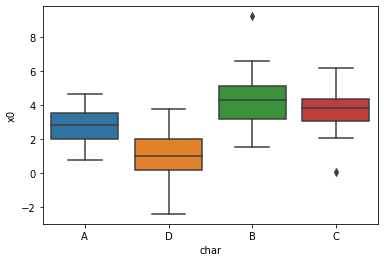

In [44]:
sns.boxplot(x="char", y="x0", data=df2)

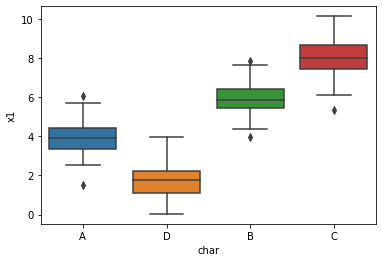

In [45]:
ax = sns.boxplot(x="char", y="x1", data=df2)
# ax = sns.swarmplot(x="char", y="x1", data=df3, color=".25")

<AxesSubplot:xlabel='char', ylabel='x2'>

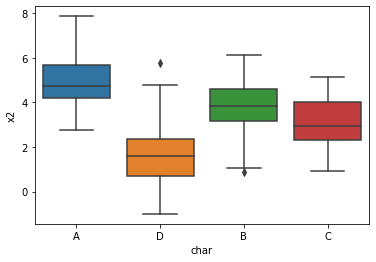

In [46]:
sns.boxplot(x="char", y="x2", data=df2)

<AxesSubplot:xlabel='char', ylabel='x3'>

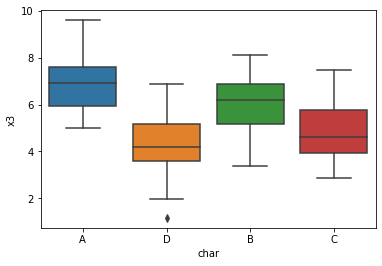

In [47]:
sns.boxplot(x="char", y="x3", data=df2)

### What Classifier would be more accurate for Dataset 2

According to the following image and pattern of datapoints in the dataset 2; Since datapotns of diffrent classes have just simply some overlap without any specific unsual form, the third row of [reference](https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html) image could be similar to dataset 2. Naive bayes is the best alternative, with some other models with probably close accuracies such as AdaBoost,Nueral Net,Decision Tree and svm.

# Dataset 3

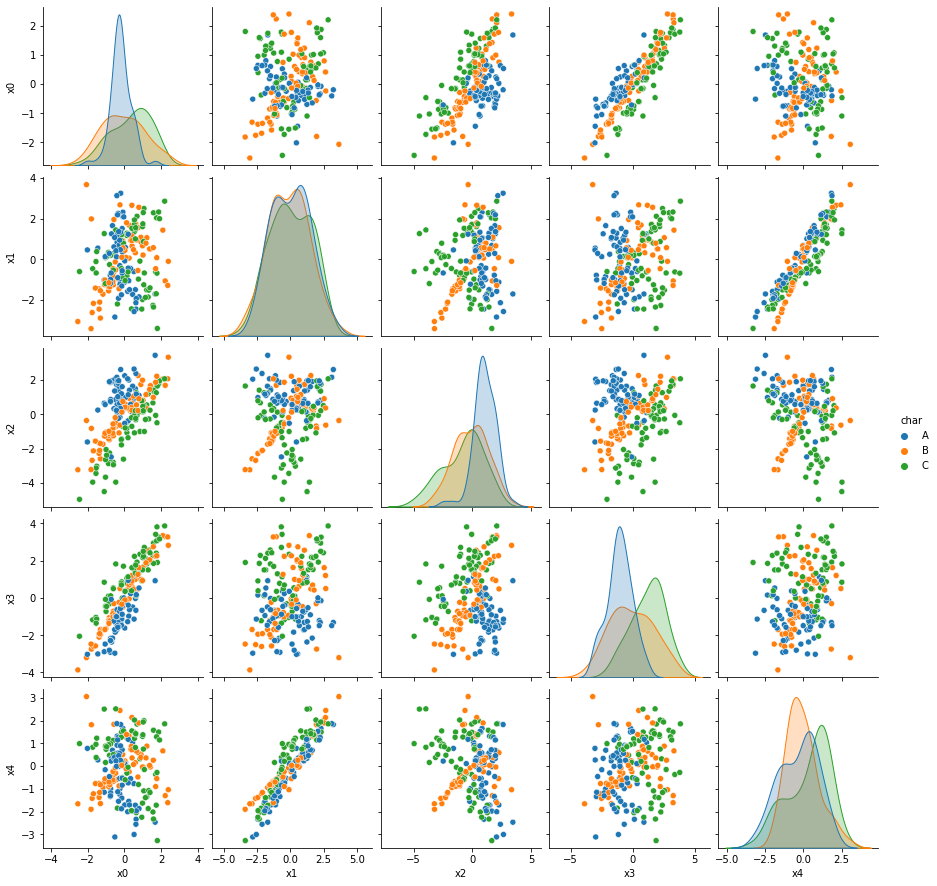

In [48]:
df3 = pd.read_csv('data/dataset3.csv').drop('Unnamed: 0', axis=1)
sns.pairplot(data =df3, hue='char')

##### Pairplot-Dataset 3
However this dataset has 6 variables which is more than the first two datasets and could be an advantage, but, not only points have a little bit more sever overlap than the first two dataset,but also there is some linear trend in correlation between two pairs of variables.

In [49]:
#First five rows of DataFrame
df3.head()

,x0,x1,x2,x3,x4,char
0,-0.39,2.18,1.46,-1.22,1.32,A
1,2.23,-1.06,1.69,3.28,-1.30,B
2,-1.31,-2.88,-2.59,-1.70,-1.65,B
3,-0.43,-0.94,-0.69,-0.66,-0.59,B
4,1.22,-1.50,0.55,1.82,-1.36,C


In [50]:
df3.shape

(200, 6)

In [51]:
x_train3, x_test3, y_train3, y_test3 = train_test_split(df3.values[:,0:5], df3.values[:,5], test_size=0.5, random_state=0)

In [52]:
gnb3 = GaussianNB()

In [53]:
gnb3.fit(x_train3, y_train3)

GaussianNB()

In [54]:
y_pred3 = gnb3.predict(x_test3)
y_pred3

array(['A', 'A', 'B', 'C', 'C', 'C', 'A', 'B', 'A', 'A', 'C', 'C', 'A',
       'B', 'C', 'A', 'C', 'C', 'B', 'B', 'C', 'C', 'B', 'C', 'C', 'A',
       'C', 'C', 'A', 'B', 'A', 'B', 'A', 'A', 'A', 'C', 'B', 'B', 'C',
       'B', 'B', 'A', 'C', 'A', 'C', 'B', 'B', 'B', 'A', 'A', 'A', 'A',
       'B', 'B', 'B', 'B', 'B', 'A', 'C', 'C', 'C', 'A', 'B', 'C', 'A',
       'A', 'B', 'A', 'B', 'A', 'C', 'C', 'B', 'C', 'B', 'C', 'C', 'C',
       'C', 'A', 'A', 'A', 'B', 'A', 'B', 'B', 'B', 'C', 'C', 'C', 'B',
       'C', 'A', 'B', 'C', 'B', 'B', 'C', 'C', 'C'], dtype='<U1')

In [55]:
y_test3

array(['A', 'A', 'A', 'B', 'C', 'C', 'A', 'C', 'A', 'B', 'B', 'C', 'A',
       'C', 'C', 'A', 'C', 'B', 'B', 'A', 'B', 'B', 'B', 'B', 'B', 'A',
       'B', 'C', 'A', 'B', 'C', 'B', 'A', 'A', 'A', 'C', 'A', 'C', 'C',
       'C', 'C', 'A', 'C', 'A', 'C', 'C', 'C', 'B', 'A', 'A', 'A', 'B',
       'B', 'B', 'B', 'A', 'C', 'A', 'B', 'A', 'C', 'A', 'B', 'B', 'A',
       'A', 'B', 'A', 'C', 'A', 'C', 'C', 'B', 'B', 'B', 'C', 'B', 'C',
       'C', 'A', 'A', 'A', 'C', 'A', 'B', 'B', 'B', 'B', 'A', 'B', 'B',
       'C', 'B', 'C', 'C', 'C', 'C', 'C', 'C', 'B'], dtype=object)

In [56]:
sum(y_test3 == y_pred3)

62

In [57]:
len(y_pred3)

100

In [58]:
accuracy3 = sum(y_test3 == y_pred3)/len(y_pred3)*100
print('accuracy = ', accuracy3, '%')

accuracy =  62.0 %


62% accuracy could not considered as an acceptabl accuracy. Therefore Gaussian Naive Bayes is not a good model to predict chatogories in this dataset.

# EDA

In [59]:
#numerical summary of each attribute
df3.describe()

,x0,x1,x2,x3,x4
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.026750,-0.017300,0.048950,0.020950,-0.029100
std,0.991478,1.482175,1.583418,1.676538,1.258804
min,-2.540000,-3.400000,-4.950000,-3.870000,-3.280000
25%,-0.612500,-1.182500,-0.870000,-1.232500,-0.910000
50%,-0.110000,0.085000,0.325000,-0.155000,0.090000
75%,0.650000,1.100000,1.142500,1.297500,0.897500
max,2.400000,3.660000,3.440000,3.860000,3.060000


In [60]:
df3.groupby('char').mean()

,x0,x1,x2,x3,x4
char,,,,,
A,-0.206029,0.034412,1.022647,-1.054265,-0.332941
B,-0.056418,-0.119701,-0.120299,-0.066119,-0.063731
C,0.356000,0.034154,-0.795231,1.235538,0.324462


In [61]:
df3.groupby('char').describe().stack().reset_index()

,char,level_1,x0,x1,x2,x3,x4
0,A,count,68.000000,68.000000,68.000000,68.000000,68.000000
1,A,mean,-0.206029,0.034412,1.022647,-1.054265,-0.332941
2,A,std,0.551771,1.441447,0.952377,0.994536,1.252074
3,A,min,-2.020000,-2.830000,-2.480000,-3.030000,-3.120000
4,A,25%,-0.467500,-1.067500,0.577500,-1.565000,-1.317500
5,A,50%,-0.250000,0.190000,0.930000,-1.020000,-0.010000
6,A,75%,0.030000,1.097500,1.662500,-0.442500,0.565000
7,A,max,1.680000,3.240000,3.440000,1.130000,1.870000
8,B,count,67.000000,67.000000,67.000000,67.000000,67.000000
9,B,mean,-0.056418,-0.119701,-0.120299,-0.066119,-0.063731


In [62]:
df3.groupby('char').size()

char
A    68
B    67
C    65
dtype: int64

### Confusion Matrix 

In [63]:
from sklearn.metrics import confusion_matrix, classification_report

In [64]:
confusion_matrix(y_test3, y_pred3)

array([[26,  4,  2],
       [ 3, 16, 15],
       [ 1, 13, 20]])

In [65]:
print(classification_report(y_test3, y_pred3))

              precision    recall  f1-score   support

           A       0.87      0.81      0.84        32
           B       0.48      0.47      0.48        34
           C       0.54      0.59      0.56        34

    accuracy                           0.62       100
   macro avg       0.63      0.62      0.63       100
weighted avg       0.63      0.62      0.62       100



Interestingly preciosions and realls of all last three datsets have had close measures, For example here precisionis 0.63 and recall is 0.62. 

**Question:** Is there any specific reason for that?

In [66]:
df3.groupby('char').mean()

,x0,x1,x2,x3,x4
char,,,,,
A,-0.206029,0.034412,1.022647,-1.054265,-0.332941
B,-0.056418,-0.119701,-0.120299,-0.066119,-0.063731
C,0.356000,0.034154,-0.795231,1.235538,0.324462


In [67]:
df3.groupby('char').describe().stack().reset_index()

,char,level_1,x0,x1,x2,x3,x4
0,A,count,68.000000,68.000000,68.000000,68.000000,68.000000
1,A,mean,-0.206029,0.034412,1.022647,-1.054265,-0.332941
2,A,std,0.551771,1.441447,0.952377,0.994536,1.252074
3,A,min,-2.020000,-2.830000,-2.480000,-3.030000,-3.120000
4,A,25%,-0.467500,-1.067500,0.577500,-1.565000,-1.317500
5,A,50%,-0.250000,0.190000,0.930000,-1.020000,-0.010000
6,A,75%,0.030000,1.097500,1.662500,-0.442500,0.565000
7,A,max,1.680000,3.240000,3.440000,1.130000,1.870000
8,B,count,67.000000,67.000000,67.000000,67.000000,67.000000
9,B,mean,-0.056418,-0.119701,-0.120299,-0.066119,-0.063731


### Boxplots-Dataset 3

<AxesSubplot:xlabel='char', ylabel='x0'>

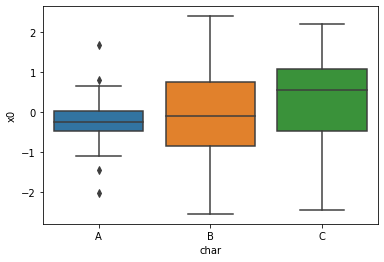

In [68]:
sns.boxplot(x="char", y="x0", data=df3)

<AxesSubplot:xlabel='char', ylabel='x1'>

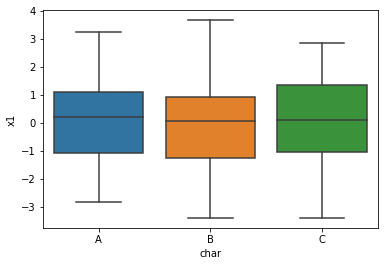

In [69]:
sns.boxplot(x="char", y="x1", data=df3)

<AxesSubplot:xlabel='char', ylabel='x2'>

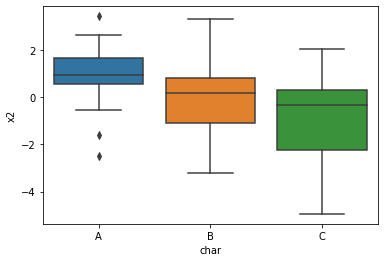

In [70]:
sns.boxplot(x="char", y="x2", data=df3)

<AxesSubplot:xlabel='char', ylabel='x3'>

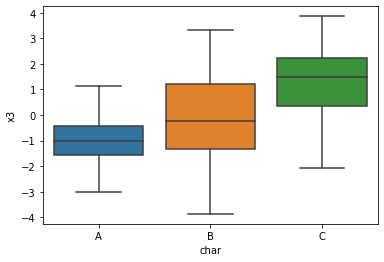

In [71]:
sns.boxplot(x="char", y="x3", data=df3)

<AxesSubplot:xlabel='char', ylabel='x4'>

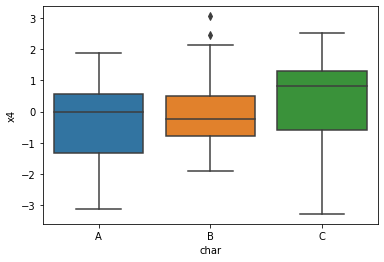

In [72]:
sns.boxplot(x="char", y="x4", data=df3)

AS we can see in the above box plots each representig distribution of a variable for classes, there is consideravle overlap between datapoits of classes. In this boxplots 50% of datapoints are placed within first and third qiartiles which could easily recognized by the colored boxes. Also small horizontal lines shows the values of minimum and maximum of data. Points out of min and max range are outliers.

### What Classifier would be more accurate for Dataset 3
According to the [reference](https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html) image in analysis of dataset 1, and pattern of datapoints in the dataset 3, I would say:
Since datapoints have considerable linear patterns, and overlaps, definitly GNB model could not be a good candidate. Metrics confirmed this act as well.
Looking at the pairplot we can see that plots showing correlation between x0 and x3 has linear trend and datapoints of classes seem to be seperable. Therefore maybe **Linear SVM** or **Nueral Net** would work to classify datapoints base on those correlations.

# Dataset 4

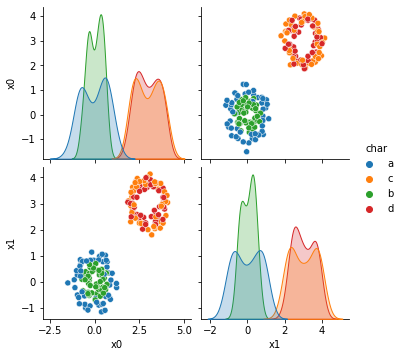

In [73]:
df4 = pd.read_csv('data/dataset4.csv').drop('Unnamed: 0', axis=1)
sns.pairplot(data =df4, hue='char')

##### Pairplot-Dataset 4
As could be infered from the above pairplot, there is a obvious overlap between variables of each two chategories and this is true for all three variables. In the gaussian distribution we expect datapoints to be more center oriented, while three categories have a circular shape with more density in the edge rather than center. Between all categories, category "b" lookds the only one which satisfies required criteria for a GNB model. Also, having only two variables in this datset is the other disadvantage. Therefore, in general we do not expect very satisfying outcome from the GNB model, let's try and see.

In [74]:
#First five rows of DataFrame
df4.head()

,x0,x1,char
0,0.47,0.77,a
1,-0.57,-0.54,a
2,1.23,-0.22,a
3,2.09,3.26,c
4,3.52,3.76,c


In [75]:
df4.shape

(200, 3)

In [76]:
x_train4, x_test4, y_train4, y_test4 = train_test_split(df4.values[:,0:2], df4.values[:,2], test_size=0.5, random_state=0)

In [77]:
gnb4 = GaussianNB()

In [78]:
gnb4.fit(x_train4, y_train4)

GaussianNB()

In [79]:
y_pred4 = gnb4.predict(x_test4)
y_pred4

array(['b', 'c', 'c', 'b', 'd', 'd', 'b', 'c', 'c', 'a', 'a', 'b', 'c',
       'c', 'c', 'b', 'b', 'd', 'c', 'a', 'c', 'b', 'a', 'c', 'a', 'c',
       'd', 'c', 'd', 'c', 'b', 'b', 'a', 'a', 'c', 'c', 'c', 'c', 'd',
       'a', 'b', 'd', 'a', 'c', 'a', 'c', 'c', 'a', 'a', 'c', 'c', 'b',
       'c', 'd', 'a', 'c', 'c', 'b', 'b', 'c', 'c', 'c', 'd', 'a', 'c',
       'a', 'd', 'd', 'a', 'b', 'a', 'd', 'c', 'a', 'b', 'c', 'a', 'a',
       'c', 'b', 'a', 'c', 'c', 'c', 'a', 'a', 'a', 'a', 'b', 'c', 'c',
       'b', 'c', 'a', 'b', 'c', 'b', 'a', 'c', 'c'], dtype='<U1')

In [80]:
y_test4

array(['b', 'd', 'c', 'b', 'd', 'd', 'b', 'c', 'd', 'a', 'a', 'b', 'd',
       'd', 'd', 'a', 'b', 'c', 'd', 'a', 'd', 'b', 'a', 'd', 'b', 'd',
       'c', 'c', 'c', 'c', 'a', 'b', 'a', 'a', 'c', 'c', 'd', 'c', 'd',
       'a', 'a', 'c', 'a', 'd', 'a', 'd', 'd', 'a', 'a', 'c', 'd', 'b',
       'c', 'd', 'a', 'd', 'd', 'b', 'b', 'c', 'd', 'c', 'd', 'a', 'd',
       'a', 'd', 'c', 'b', 'b', 'b', 'd', 'd', 'a', 'b', 'd', 'a', 'b',
       'c', 'b', 'b', 'c', 'd', 'd', 'a', 'a', 'a', 'a', 'b', 'd', 'd',
       'b', 'c', 'b', 'a', 'c', 'b', 'a', 'd', 'c'], dtype=object)

How many test-samples are detected correctly?

In [81]:
sum(y_test4 == y_pred4)

60

How many test-samples totally we have?

In [82]:
len(y_pred4)

100

What is the accuracy of our prediction?

In [83]:
accuracy4 = sum(y_test4 == y_pred4)/len(y_pred4)*100
print('accuracy = ', accuracy4, '%')

accuracy =  60.0 %


we also can predict accuracy using 'precision_score' function from ' sklearn.metrics' module like below which results the same value,

In [84]:
accuracy_sklearn4 = sklearn.metrics.precision_score(y_test4, y_pred4, average = 'micro')
print('accuracy = ', accuracy_sklearn4*100, '%')

accuracy =  60.0 %


60% accuracy is not a satisfying accuracy. Therefore, Gaussian Naive Bayes is not a good model to predict chatogories in this dataset.

# EDA

In [85]:
#numerical summary of each attribute
df4.describe()

,x0,x1
count,200.00000,200.000000
mean,1.48765,1.511200
std,1.61991,1.614312
min,-1.51000,-1.150000
25%,0.08250,0.077500
50%,1.54500,1.470000
75%,2.93250,3.002500
max,4.09000,4.130000


In [86]:
df4.groupby('char').mean()

,x0,x1
char,,
a,-0.0248,-0.0038
b,0.0222,0.0334
c,2.9758,2.9936
d,2.9774,3.0216


In [87]:
df4.groupby('char').describe().stack().reset_index()

,char,level_1,x0,x1
0,a,count,50.000000,50.000000
1,a,mean,-0.024800,-0.003800
2,a,std,0.741758,0.715365
3,a,min,-1.510000,-1.150000
4,a,25%,-0.762500,-0.635000
5,a,50%,0.075000,0.015000
6,a,75%,0.615000,0.745000
7,a,max,1.230000,1.140000
8,b,count,50.000000,50.000000
9,b,mean,0.022200,0.033400


In [88]:
#Distribution of categories
df4.groupby('char').size()

char
a    50
b    50
c    50
d    50
dtype: int64

We can see that there is not a uniform distribution between class instances.This can lead precisioin to not be an ideal metric to evaluate performance of model. Then let's discover other metrics as well.

### Confusion Matrix
We can then use confusion matrix to find deiatles of predictions vs actual labels for each class. "sklearn.metrics" modul provides us two fuctions for this porpuse. 

In [89]:
from sklearn.metrics import confusion_matrix, classification_report

In [90]:
confusion_matrix(y_test4, y_pred4)

array([[21,  4,  0,  0],
       [ 6, 16,  0,  0],
       [ 0,  0, 16,  5],
       [ 0,  0, 25,  7]])

In this confusion matrix we can see that GNB model had 2 wrong predictions for each classes 1,2,and 4, also 3 wrong prediction for class 3. 

In [91]:
print(classification_report(y_test4, y_pred4))

              precision    recall  f1-score   support

           a       0.78      0.84      0.81        25
           b       0.80      0.73      0.76        22
           c       0.39      0.76      0.52        21
           d       0.58      0.22      0.32        32

    accuracy                           0.60       100
   macro avg       0.64      0.64      0.60       100
weighted avg       0.64      0.60      0.58       100



In the above classification report we can see how precision, recal, f1-score and number of samples were for each class in this GNB model.

 let's group by the 'char' column

In [92]:
df4.groupby('char').mean()

,x0,x1
char,,
a,-0.0248,-0.0038
b,0.0222,0.0334
c,2.9758,2.9936
d,2.9774,3.0216


In [93]:
df4.groupby('char').describe().stack().reset_index()

,char,level_1,x0,x1
0,a,count,50.000000,50.000000
1,a,mean,-0.024800,-0.003800
2,a,std,0.741758,0.715365
3,a,min,-1.510000,-1.150000
4,a,25%,-0.762500,-0.635000
5,a,50%,0.075000,0.015000
6,a,75%,0.615000,0.745000
7,a,max,1.230000,1.140000
8,b,count,50.000000,50.000000
9,b,mean,0.022200,0.033400


### Boxplots-Dataset 4

<AxesSubplot:xlabel='char', ylabel='x0'>

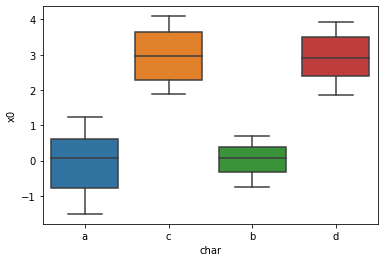

In [94]:
sns.boxplot(x="char", y="x0", data=df4)

<AxesSubplot:xlabel='char', ylabel='x1'>

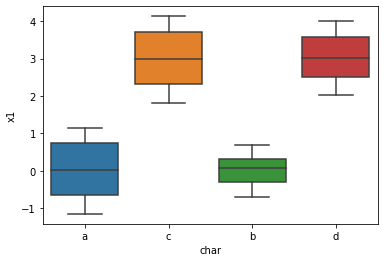

In [95]:
sns.boxplot(x="char", y="x1", data=df4)

From the above boxplots we can obviously see what we predicted about the overlap between pairs of classes was true.

### What Classifier would be more accurate for Dataset 4
According to the [reference](https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html) image in analysis of dataset 1, and pattern of datapoints in the dataset 4, I would say:
Since datapoints have hollow-circular patterns, and there is some minor overlaps between them, definitly GNB model could not be a good candidate. Metrics confirmed this fact as well. Also paterns of datapoints is similar to the second row in the reference image. 
Therefore maybe **Nearest Neighbors** would work better on this type of dataset.

# Dataset 5

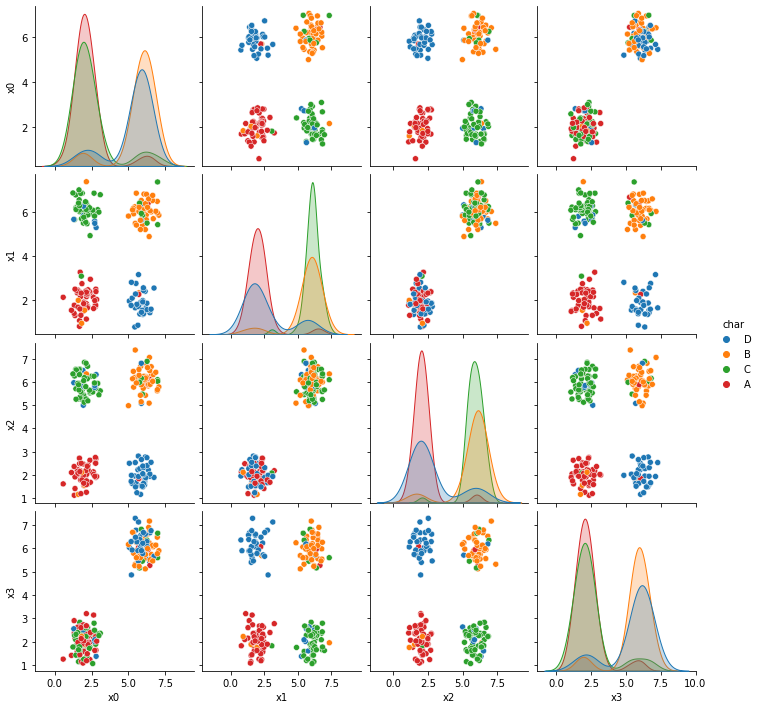

In [97]:
df5 = pd.read_csv('data/dataset5.csv').drop('Unnamed: 0', axis=1)
sns.pairplot(data =df5, hue='char')

##### Pairplot-Dataset 5
This dataset seems to have many outliers, as there are some points of other categories in between a goup of one category. Also there is overlap between categories for some variables and correlations between variables. This is not a good condition to use GNB, since GNB can not detect unfocused datapoints. On the other hand we have 4 variables and circular shape of dataponts. Also datapoints are very grouped. Let's see how this combination of advantageous and disadvantageous properties work for GNB.

In [98]:
#First five rows of DataFrame
df5.head()

,x0,x1,x2,x3,char
0,6.10,1.58,1.72,5.71,D
1,2.81,5.28,6.32,1.37,D
2,6.42,6.01,7.06,7.17,B
3,1.95,5.48,5.46,1.58,C
4,1.33,1.75,1.12,2.37,A


In [99]:
df5.shape

(200, 5)

In [100]:
x_train5, x_test5, y_train5, y_test5 = train_test_split(df5.values[:,0:4], df5.values[:,4], test_size=0.5, random_state=0)

In [101]:
gnb5 = GaussianNB()

In [102]:
gnb5.fit(x_train5, y_train5)

GaussianNB()

In [103]:
y_pred5 = gnb5.predict(x_test5)
y_pred5

array(['A', 'C', 'B', 'D', 'D', 'A', 'D', 'D', 'A', 'D', 'A', 'C', 'D',
       'D', 'B', 'B', 'C', 'A', 'B', 'C', 'D', 'B', 'A', 'B', 'A', 'C',
       'B', 'B', 'A', 'B', 'C', 'A', 'D', 'A', 'C', 'D', 'A', 'A', 'D',
       'C', 'C', 'B', 'A', 'D', 'B', 'B', 'B', 'A', 'A', 'C', 'D', 'A',
       'A', 'D', 'A', 'D', 'C', 'B', 'A', 'C', 'C', 'C', 'B', 'B', 'A',
       'A', 'D', 'A', 'C', 'B', 'C', 'B', 'A', 'A', 'C', 'D', 'D', 'D',
       'C', 'C', 'D', 'A', 'B', 'D', 'C', 'A', 'B', 'B', 'B', 'A', 'B',
       'A', 'C', 'D', 'B', 'B', 'D', 'D', 'B', 'B'], dtype='<U1')

In [104]:
y_test5

array(['A', 'C', 'C', 'D', 'D', 'A', 'D', 'D', 'A', 'D', 'A', 'C', 'D',
       'D', 'B', 'B', 'C', 'A', 'B', 'C', 'D', 'B', 'A', 'A', 'A', 'C',
       'C', 'B', 'A', 'B', 'C', 'A', 'D', 'A', 'C', 'D', 'A', 'A', 'A',
       'C', 'C', 'D', 'A', 'D', 'B', 'B', 'B', 'A', 'B', 'D', 'D', 'A',
       'A', 'D', 'A', 'D', 'C', 'B', 'A', 'C', 'D', 'C', 'B', 'B', 'A',
       'A', 'D', 'A', 'B', 'B', 'C', 'A', 'A', 'A', 'D', 'D', 'D', 'D',
       'C', 'D', 'D', 'A', 'B', 'D', 'C', 'A', 'B', 'B', 'B', 'A', 'B',
       'A', 'C', 'D', 'B', 'B', 'D', 'D', 'B', 'B'], dtype=object)

How many test-samples are detected correctly?

In [105]:
sum(y_test5 == y_pred5)

88

How many test-samples totally we have?

In [106]:
len(y_pred5)

100

What is the accuracy of our prediction?

In [107]:
accuracy5 = sum(y_test5 == y_pred5)/len(y_pred5)*100
print('accuracy = ', accuracy5, '%')

accuracy =  88.0 %


we also can predict accuracy using 'precision_score' function from ' sklearn.metrics' module like below which results the same value,

In [108]:
accuracy_sklearn5 = sklearn.metrics.precision_score(y_test5, y_pred5, average = 'micro')
print('accuracy = ', accuracy_sklearn5*100, '%')

accuracy =  88.0 %


88% accuracy is not considered as a perfect accuracy but not too bad as expected to be worse. Therefore Gaussian Naive Bayes is not too bad to predict chatogories in this dataset. The main problem with this dataset is outliers which may be corrected by cleaning them in the first step.

# EDA

In [109]:
#numerical summary of each attribute
df5.describe()

,x0,x1,x2,x3
count,200.000000,200.000000,200.000000,200.000000
mean,3.818650,4.159100,4.153400,3.848700
std,2.047627,2.135003,2.044769,2.062987
min,0.580000,0.760000,1.120000,1.060000
25%,1.950000,1.897500,2.027500,1.970000
50%,2.755000,5.430000,5.255000,2.650000
75%,5.940000,6.090000,6.050000,5.950000
max,7.060000,7.360000,7.380000,7.290000


In [110]:
df5.groupby('char').mean()

,x0,x1,x2,x3
char,,,,
A,2.244259,2.138704,2.164444,2.263148
B,5.733958,5.686875,5.723542,5.666458
C,2.486111,6.069630,5.847963,2.461481
D,5.296818,2.627273,2.801818,5.514091


In [111]:
df5.groupby('char').describe().stack().reset_index()

,char,level_1,x0,x1,x2,x3
0,A,count,54.000000,54.000000,54.000000,54.000000
1,A,mean,2.244259,2.138704,2.164444,2.263148
2,A,std,1.071861,0.991152,0.849539,0.995093
3,A,min,0.580000,0.790000,1.120000,1.080000
4,A,25%,1.715000,1.637500,1.780000,1.770000
5,A,50%,2.090000,2.060000,2.030000,2.075000
6,A,75%,2.385000,2.355000,2.327500,2.457500
7,A,max,6.450000,6.660000,6.110000,6.070000
8,B,count,48.000000,48.000000,48.000000,48.000000
9,B,mean,5.733958,5.686875,5.723542,5.666458


In [112]:
#Distribution of categories
df5.groupby('char').size()

char
A    54
B    48
C    54
D    44
dtype: int64

We can see that there is not a uniform distribution between class instances.This can lead precisioin to not be an ideal metric to evaluate performance of model. Then let's discover other metrics as well.

### Confusion Matrix
We can then use confusion matrix to find deiatles of predictions vs actual labels for each class. "sklearn.metrics" modul provides us two fuctions for this porpuse. 

In [113]:
from sklearn.metrics import confusion_matrix, classification_report

In [114]:
confusion_matrix(y_test5, y_pred5)

array([[27,  2,  0,  1],
       [ 1, 22,  1,  0],
       [ 0,  2, 16,  0],
       [ 0,  1,  4, 23]])

In this confusion matrix we can see that GNB model had 2 wrong predictions for each classes 1,2,and 4, also 3 wrong prediction for class 3. 

In [115]:
print(classification_report(y_test5, y_pred5))

              precision    recall  f1-score   support

           A       0.96      0.90      0.93        30
           B       0.81      0.92      0.86        24
           C       0.76      0.89      0.82        18
           D       0.96      0.82      0.88        28

    accuracy                           0.88       100
   macro avg       0.87      0.88      0.87       100
weighted avg       0.89      0.88      0.88       100



In the above classification report we can see how precision, recal, f1-score and number of samples were for each class in this GNB model.

Since we want to check outliers, boxplot could be handy to make a intuition about that

### Boxplots-Dataset 5

<AxesSubplot:xlabel='char', ylabel='x0'>

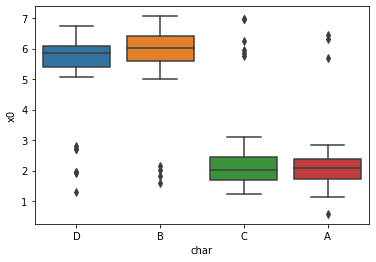

In [116]:
sns.boxplot(x="char", y="x0", data=df5)

<AxesSubplot:xlabel='char', ylabel='x1'>

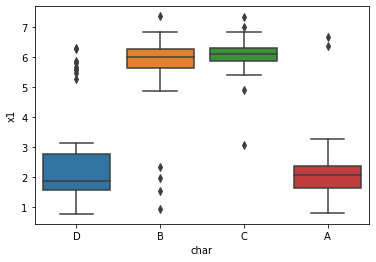

In [117]:
sns.boxplot(x="char", y="x1", data=df5)

<AxesSubplot:xlabel='char', ylabel='x2'>

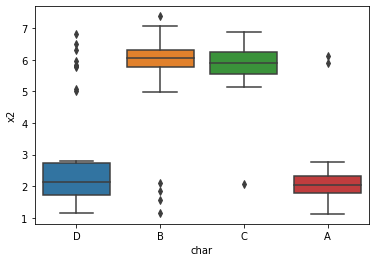

In [118]:
sns.boxplot(x="char", y="x2", data=df5)

<AxesSubplot:xlabel='char', ylabel='x3'>

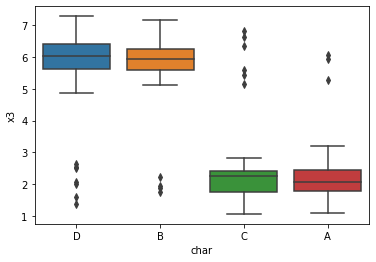

In [119]:
sns.boxplot(x="char", y="x3", data=df5)

The above boxplots obviously have many outliers which aree black dots out of minimum and maximum ranges. THis plot was compatible with our initial assumption about outliers which was inspired fronmmt th pairplots in the begining of analysis.

### What Classifier would be more accurate for Dataset 5
According to the [reference](https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html) image in analysis of dataset 1, and pattern of datapoints in the dataset 5, I would say:
Main obstacle in this dataset is outliers. Otherwise considering circular shape and seperated pattern of class datapoints makes this dataset an excelent candidate for GNB classifier. Probably we need to remove outliers and model it again to achive a more satisfacory result.

# Dataset 6

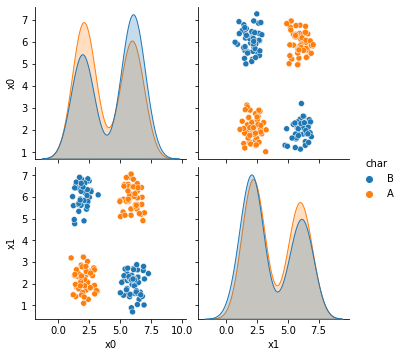

In [121]:
df6 = pd.read_csv('data/dataset6.csv').drop('Unnamed: 0', axis=1)
sns.pairplot(data =df6, hue='char')

##### Pairplot-Dataset 6
Interestingly, two variables of this dataset have a lot of overlap in their distribution diagrams which could mean that they have similar characteristics considering those specific variables, but correlation between variables are different since datapoints are perfectly seperate in the scater plots. Also datapoints have a circular shape. Generally it seems vague to me what happens, in one hand, datapoints are seperate and perfectly circular, on the other hand they eem to look like each other considering distribution diagrams. Let's see!

In [122]:
#First five rows of DataFrame
df6.head()

,x0,x1,char
0,6.14,2.10,B
1,2.22,2.39,A
2,2.27,5.44,B
3,1.03,3.19,A
4,2.25,1.71,A


In [123]:
df6.shape

(200, 3)

In [124]:
x_train6, x_test6, y_train6, y_test6 = train_test_split(df6.values[:,0:2], df6.values[:,2], test_size=0.5, random_state=0)

In [125]:
gnb6 = GaussianNB()

In [126]:
gnb6.fit(x_train6, y_train6)

GaussianNB()

In [127]:
y_pred6 = gnb6.predict(x_test6)
y_pred6

array(['B', 'A', 'B', 'A', 'B', 'B', 'B', 'B', 'B', 'A', 'B', 'B', 'A',
       'B', 'A', 'A', 'B', 'B', 'A', 'B', 'A', 'A', 'A', 'B', 'B', 'B',
       'A', 'B', 'B', 'B', 'B', 'A', 'B', 'A', 'A', 'A', 'B', 'A', 'B',
       'A', 'A', 'B', 'A', 'A', 'B', 'B', 'B', 'B', 'A', 'B', 'A', 'B',
       'A', 'B', 'A', 'B', 'A', 'A', 'B', 'B', 'A', 'B', 'B', 'B', 'A',
       'B', 'A', 'B', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'A', 'B', 'A',
       'B', 'A', 'B', 'A', 'B', 'A', 'B', 'B', 'A', 'A', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'A', 'A', 'A'], dtype='<U1')

In [128]:
y_test6

array(['A', 'A', 'B', 'A', 'B', 'B', 'A', 'A', 'A', 'A', 'B', 'A', 'B',
       'A', 'A', 'B', 'A', 'A', 'A', 'B', 'A', 'B', 'A', 'A', 'A', 'B',
       'B', 'B', 'B', 'B', 'B', 'A', 'B', 'B', 'B', 'A', 'A', 'A', 'B',
       'B', 'A', 'A', 'A', 'A', 'A', 'A', 'B', 'B', 'A', 'B', 'B', 'B',
       'A', 'B', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'A', 'B', 'B', 'B',
       'B', 'A', 'B', 'B', 'A', 'B', 'B', 'A', 'B', 'A', 'B', 'B', 'A',
       'B', 'A', 'B', 'A', 'A', 'B', 'A', 'B', 'B', 'A', 'B', 'A', 'B',
       'A', 'A', 'A', 'B', 'B', 'A', 'A', 'A', 'A'], dtype=object)

How many test-samples are detected correctly?

In [129]:
sum(y_test6 == y_pred6)

59

How many test-samples totally we have?

In [130]:
len(y_pred6)

100

What is the accuracy of our prediction?

In [144]:
accuracy6 = sum(y_test6 == y_pred6)/len(y_pred6)*100
print('accuracy = ', accuracy6, '%')

accuracy =  59.0 %


59% accuracy shows that GNB had problem to classify datapoints. It could be attributed to the similar characteristics of classes considering overlapped data distribution diagrams. Therefore seperated datapoints and being circular only represents independecy of variables, but it is not enouh condition for a dataset to be classified by GNB.

# EDA

In [132]:
#numerical summary of each attribute
df6.describe()

,x0,x1
count,200.000000,200.000000
mean,4.100750,3.810850
std,2.049675,2.033484
min,1.030000,0.700000
25%,2.027500,2.075000
50%,5.160000,2.690000
75%,5.990000,5.900000
max,7.260000,7.060000


In [133]:
df6.groupby('char').mean()

,x0,x1
char,,
A,3.866535,3.94495
B,4.339697,3.67404


In [134]:
df6.groupby('char').describe().stack().reset_index()

,char,level_1,x0,x1
0,A,count,101.000000,101.000000
1,A,mean,3.866535,3.944950
2,A,std,2.005447,1.986427
3,A,min,1.030000,1.100000
4,A,25%,1.960000,2.150000
5,A,50%,2.910000,2.860000
6,A,75%,5.840000,5.900000
7,A,max,6.940000,7.060000
8,B,count,99.000000,99.000000
9,B,mean,4.339697,3.674040


In [135]:
#Distribution of categories
df6.groupby('char').size()

char
A    101
B     99
dtype: int64

### Confusion Matrix

In [136]:
from sklearn.metrics import confusion_matrix, classification_report

In [137]:
confusion_matrix(y_test3, y_pred3)

array([[26,  4,  2],
       [ 3, 16, 15],
       [ 1, 13, 20]])

In [138]:
print(classification_report(y_test3, y_pred3))

              precision    recall  f1-score   support

           A       0.87      0.81      0.84        32
           B       0.48      0.47      0.48        34
           C       0.54      0.59      0.56        34

    accuracy                           0.62       100
   macro avg       0.63      0.62      0.63       100
weighted avg       0.63      0.62      0.62       100



**Question:** Why calculated accuracy by "classification_report" is 3% higher than manually calcualted one?

### Boxplots-Dataset 6

<AxesSubplot:xlabel='char', ylabel='x0'>

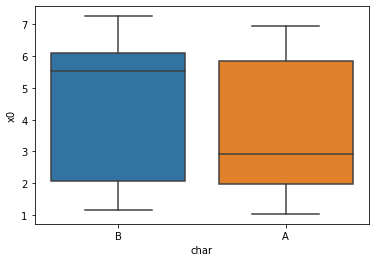

In [139]:
sns.boxplot(x="char", y="x0", data=df6)

<AxesSubplot:xlabel='char', ylabel='x1'>

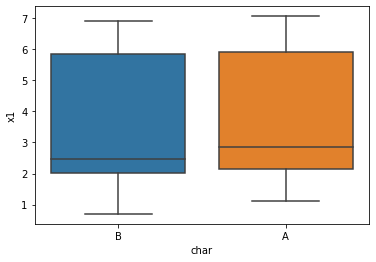

In [140]:
sns.boxplot(x="char", y="x1", data=df6)

As we can see in the above boxplots there is no outlier in the datapoints of neither of classes.

#### What Classifier would be more accurate for Dataset 6
According to the [reference](https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html) image in analysis of dataset 1, and pattern of datapoints in the dataset 6, I would say:
It could be impossible to classify those datapoints of classes, since they are very similar classes which could be considered even as one class.
Maybe one solution is adding more variables to this dataset. Then GNB may distinguish them according to that ne variable.